In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import PIL
import matplotlib.patches as patches


# Load Racoon Dataset


In [16]:
dir="C:/Datasets Temp/raccoon_dataset/"
def load_data(file):
    df=pd.read_csv(dir+file)
    temp=[]
    width,height,xmin,xmax,ymin,ymax=[],[],[],[],[],[]
    var=0
    for i in np.array(df['filename']):
        im= Image.open(dir+"images/"+i)
        x,y=im.size
        im=im.resize((224,224),PIL.Image.ANTIALIAS)
        x1,y1=im.size
        rx,ry=x1/x,y1/y
        width.append(np.array(df['width'])[var]*rx)
        height.append(np.array(df['height'])[var]*ry)
        xmin.append(np.array(df['xmin'])[var]*rx)
        ymin.append(np.array(df['ymin'][var]*ry))
        xmax.append(np.array(df['max'])[var]*rx)
        ymax.append(np.array(df['max'])[var]*ry)
        im=np.array(im)
        temp.append(im)
        var=var+1
    return temp,width,np.array(height),np.array(df['class']),np.array(xmin),np.array(ymin),np.array(xmax),np.array(ymax)
images_train,width_train,height_train,clas_train,xmin_train,ymin_train,xmax_train,ymax_train=load_data("data/train_labels.csv")

KeyError: 'min'

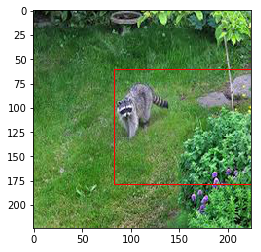

In [15]:
#Train plot test
rect = patches.Rectangle((xmin_train[0],ymin_train[0]),xmax_train[0],ymax_train[0],linewidth=1,edgecolor='r',facecolor='none')
fig,ax = plt.subplots(1)
ax.add_patch(rect)
ax.imshow(images_train[0])
